# Polynomial Regression on Noisy Sine Data
This notebook demonstrates how polynomial regression can be used to model a noisy sine-like dataset. We will:
- Generate a dataset with sine-like structure.
- Fit polynomial regression models with varying degrees.
- Compare underfitting and overfitting.
- Find the best polynomial degree based on error metrics.
- Visualize the results using Matplotlib.


In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

## Step 1: Generate a Noisy Sine-Like Dataset

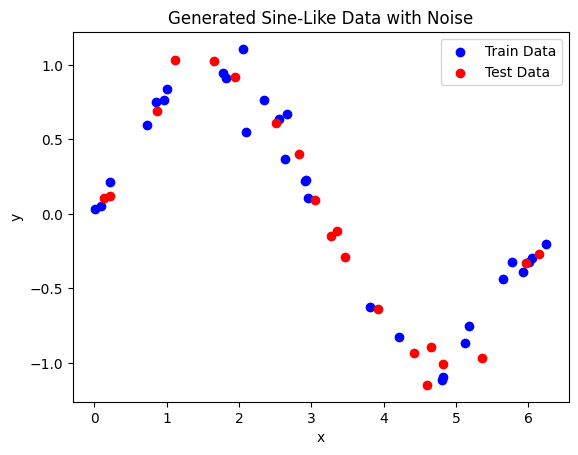

In [56]:
np.random.seed(12)
X = np.sort(2 * np.pi * np.random.rand(50, 1), axis=0)  # Random x in [0, 2π]
y = np.sin(X) + 0.1 * np.random.randn(50, 1)  # Sine with noise

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Plot dataset
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Generated Sine-Like Data with Noise')
plt.show()

## Step 2: Fit Polynomial Regression Models

In [57]:
def polynomial_regression(degree):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    return model, poly, train_error, test_error, y_train_pred, y_test_pred

## Step 3: Compare Different Polynomial Degrees

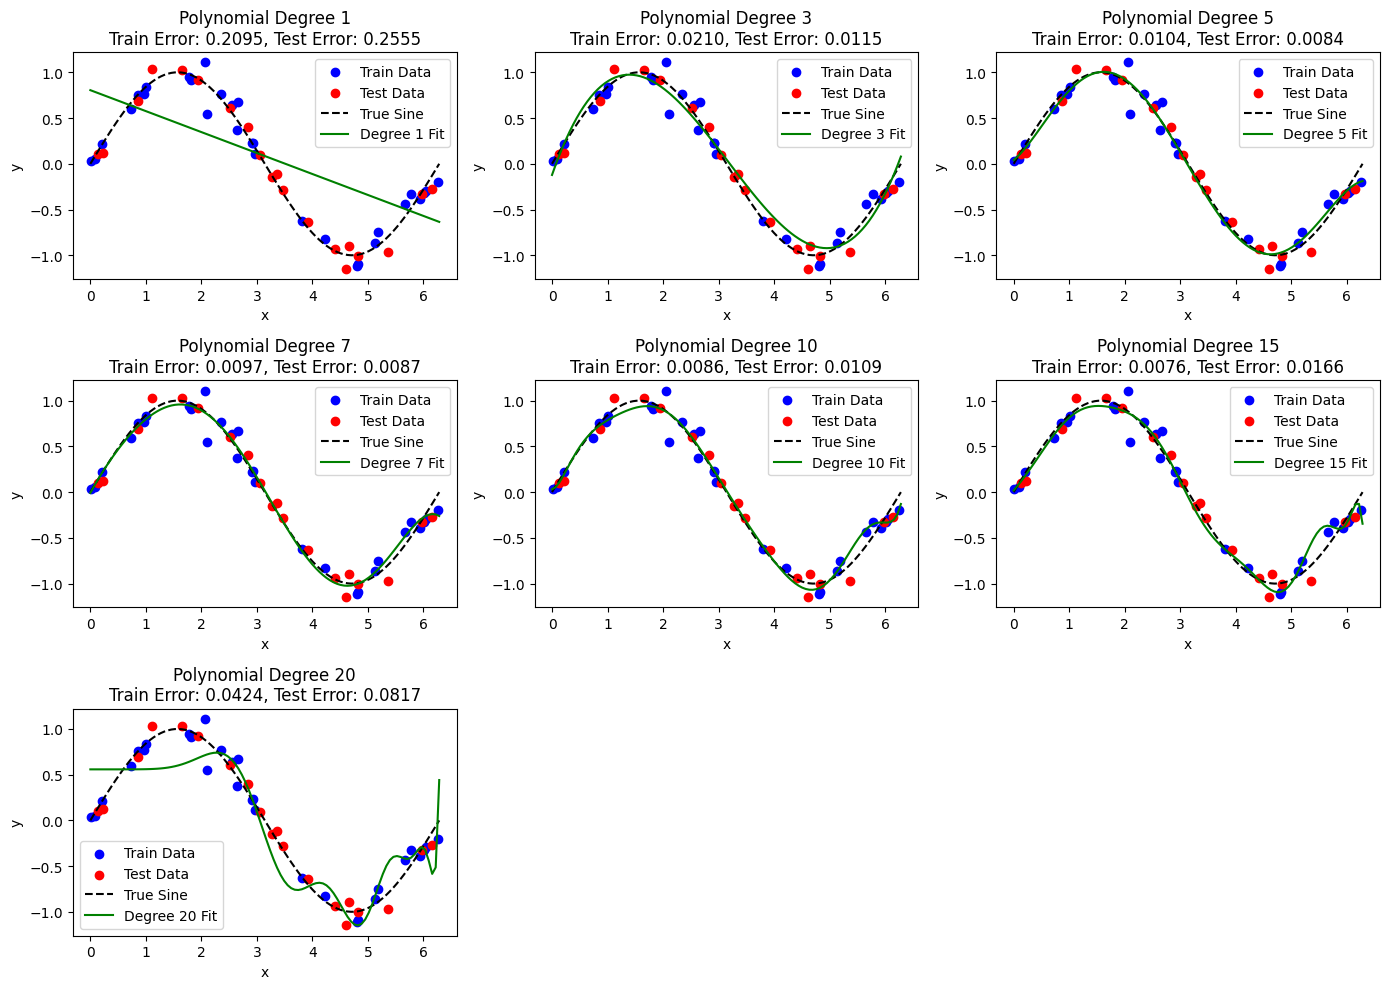

In [58]:
degrees = [1, 3, 5, 7, 10, 15, 20]  # Add more degrees

plt.figure(figsize=(14, 10))  # Adjust figure size

# Generate true sine function for comparison
X_fit = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
y_true = np.sin(X_fit)  # True sine values


for i, d in enumerate(degrees, 1):
    model, poly, train_err, test_err, y_train_pred, y_test_pred = polynomial_regression(d)
    y_fit = model.predict(poly.transform(X_fit))

    plt.subplot(3, 3, i)
    plt.scatter(X_train, y_train, color='blue', label='Train Data')
    plt.scatter(X_test, y_test, color='red', label='Test Data')
    plt.plot(X_fit, y_true, color='black', linestyle='dashed', label='True Sine')  # Sine function
    plt.plot(X_fit, y_fit, color='green', label=f'Degree {d} Fit')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Polynomial Degree {d}\nTrain Error: {train_err:.4f}, Test Error: {test_err:.4f}')
    plt.legend()

plt.tight_layout()
plt.show()


## Step 4: Find the Optimal Polynomial Degree

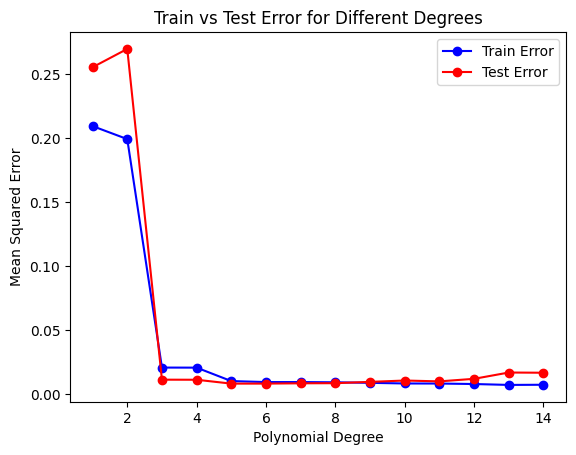

Optimal Polynomial Degree: 5


In [59]:
errors = []
degrees = range(1, 15)

for d in degrees:
    _, _, train_err, test_err, _, _ = polynomial_regression(d)
    errors.append((d, train_err, test_err))

errors = np.array(errors)

plt.plot(errors[:, 0], errors[:, 1], 'bo-', label='Train Error')
plt.plot(errors[:, 0], errors[:, 2], 'ro-', label='Test Error')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Train vs Test Error for Different Degrees')
plt.legend()
plt.show()

# Find the degree with the lowest test error
best_degree = int(errors[np.argmin(errors[:, 2]), 0])
print(f'Optimal Polynomial Degree: {best_degree}')

## Step 5: Evaluate the Best Model

In [60]:
best_model, best_poly, train_err, test_err, y_train_pred, y_test_pred = polynomial_regression(best_degree)

print(f'Best Model Train Error: {train_err:.4f}')
print(f'Best Model Test Error: {test_err:.4f}')
print(f'R² Score on Test Data: {r2_score(y_test, y_test_pred):.4f}')

Best Model Train Error: 0.0104
Best Model Test Error: 0.0084
R² Score on Test Data: 0.9822


## Conclusion
- **Low-degree models (e.g., degree 1)** underfit the data (high bias, low variance).
- **Very high-degree models (e.g., degree 10+)** overfit the data (low bias, high variance).
- The optimal polynomial degree provides the best generalization.
- We used **train-test split** and **error metrics (MSE, R²)** to evaluate performance.